### Project 4- K-Means ++ 

#### Use Iris data set to do the following:

<span class="mark">a. Using elbow method to find the optimal number of clusers</span>

k=1, SSE=26.103076447039722
k=2, SSE=16.469773740281195
k=3, SSE=15.089477089696558
k=4, SSE=15.030732170749099
k=5, SSE=14.858930749063733
k=6, SSE=14.883090350867239


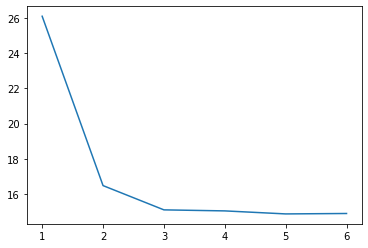

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target


k_list = list(range(1, 7))
sse_list = [0] * len(k_list)
# Enter your code here.

for kplus, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cl = kmeans.labels_
    ct = kmeans.cluster_centers_
    
    sse = 0
    for i in range(k):
        cl_i = np.where(cl == i)
        sse += np.linalg.norm(X[cl_i] - ct[i])
    print('k={}, SSE={}'.format(k, sse))
    sse_list[kplus] = sse
    
plt.plot(k_list, sse_list)
plt.show()

<span class="mark">2. Useing K-Means++ to plot the clusters</span>

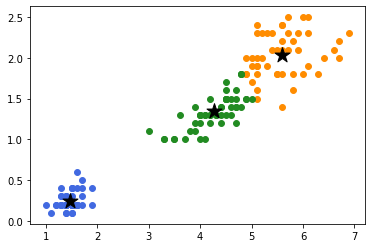

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

import numpy as np
from matplotlib import pyplot as plt
# Enter your code here.

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=35,
            c='royalblue',
            marker='o')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=35,
            c='darkorange',
            marker='o')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=35,
            c='forestgreen',
            marker='o')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='black', label='Centroids')
plt.show()


<span class="mark">3. Quantify the quality of the cluster (Iris dataset) via silhouuette plots.</span>

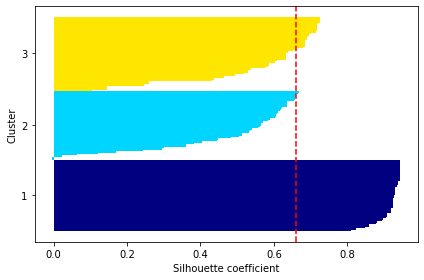

In [4]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

# Enter your code here.

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()